<a href="https://colab.research.google.com/github/fatuunreal/wadidaw/blob/main/DM_A11_2022_14831_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('dataset-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(2460, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [6]:
#mencari nilai kosong
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Preprosessing Data

In [7]:
#Memisahkan variabel terikat dan bebas
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [8]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import RobustScaler
# cols=X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.head()

# Training Model

In [10]:
#Model
from sklearn.neighbors import KNeighborsClassifier

#setup arrays to store training and test accuracies
neighbors=np.arange(1,15)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

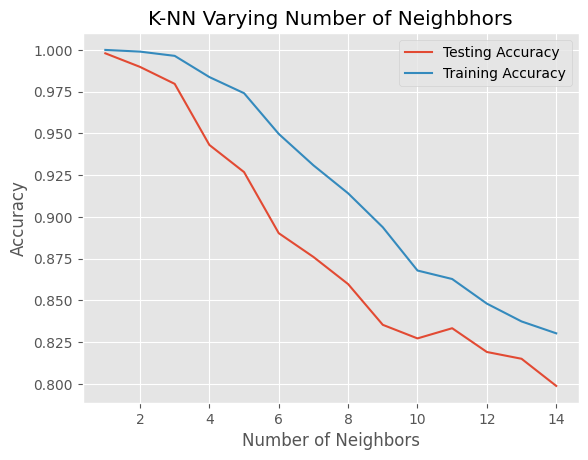

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title("K-NN Varying Number of Neighbhors")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.plot(neighbors,train_accuracy,label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [12]:
## Setup a knn classifier with k neighbors
model=KNeighborsClassifier()

model.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

# Evaluasi

## Akurasi

In [14]:
#Accuracy
from sklearn.metrics import accuracy_score
print("KNN Accuracy_Score : ",accuracy_score(y_test,y_pred))

KNN Accuracy_Score :  0.926829268292683


In [15]:
#Confusion Matrix
# from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[289  16]
 [ 20 167]]

True Positives(TP) =  289

True Negatives(TN) =  167

False Positives(FP) =  16

False Negatives(FN) =  20


<Axes: >

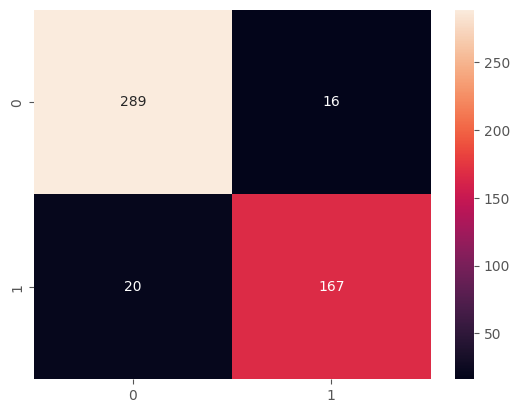

In [16]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

## Classification Report

In [17]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       305
           1       0.91      0.89      0.90       187

    accuracy                           0.93       492
   macro avg       0.92      0.92      0.92       492
weighted avg       0.93      0.93      0.93       492



## Scores from Confusion Matrix

In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9268
Classification error : 0.0732
Precision : 0.9475
Recall or Sensitivity : 0.9353
True Positive Rate : 0.9353
False Positive Rate : 0.0874
Specificity : 0.9126


## ROC Curve

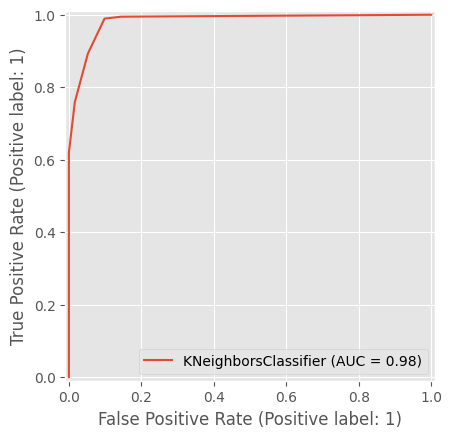

In [19]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Asumsikan model sudah dilatih sebelumnya
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


## ROC AUC Score

In [20]:
# compute ROC AUC
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9833


## Cross Validation

In [21]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.94923858 0.91878173 0.95939086 0.89847716 0.92385787 0.91370558
 0.9035533  0.89847716 0.87244898 0.91326531]


In [22]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9151


# Prediksi

In [25]:
# Example prediction
input_data = (10,125,70,26,115,31.1,0.205,41)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshape)
prediction = model.predict(std_data)

print(std_data)
print(prediction)

if prediction[0] == 0:
    print('Pasien tidak terkena diabetes')
else:
    print('Pasien terkena diabetes')

[[ 1.4         0.18934911  0.          0.09090909  0.59230769 -0.1061008
  -0.42947103  0.8       ]]
[1]
Pasien terkena diabetes


In [26]:
import pickle

In [28]:
filename = 'knn_diabetes_model.sav'
pickle.dump(model, open(filename,'wb')) # Replace classifier with model